In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

# List all files in your MyDrive
os.listdir("/content/drive/MyDrive")


['Colab Notebooks',
 'Getting started.pdf',
 'Classroom',
 'Untitled folder (1)',
 'Untitled folder',
 'CamScanner 06-04-2020 17.04.28 (2).pdf',
 'CamScanner 06-04-2020 17.04.28 (1).pdf',
 'CamScanner 06-04-2020 17.04.28.pdf',
 'ba-1969-0091.pr001.pdf',
 'EAadhaar_351848799001_24012021113207_292422.pdf',
 'Untitled document.gdoc',
 'CO 4th.docx',
 'microprocessor poster.pdf',
 'CHN POSTER, isha.pdf',
 'adv c practical, isha.pdf',
 'Document from Isha (4).pdf',
 '20211225_133126.jpg',
 'Isha Sarkar (1).pdf',
 'Isha Sarkar.pdf',
 'Isha sarkar.pdf',
 'Isha sarkar, GIP19CO035.pdf',
 'New Doc 12-25-2021 15.56.pdf',
 'New Doc 12-27-2021 14.07.pdf',
 'New Doc 12-27-2021 14.08.pdf',
 'Document  (1).pdf',
 'Document from Isha (3).pdf',
 'Document from Isha✨',
 'EDITED PPT.pptx',
 'MC REPORT (2).pdf',
 'MC REPORT (1).pdf',
 'MC REPORT.pdf',
 'Document from Isha (2).pdf',
 'Document from Isha (1).pdf',
 'Computer Organization and architecture assignment -1.pdf',
 'COMPUTER ORGANIZATION lab4.docx'

In [4]:
import zipfile

zip_path = "/content/drive/MyDrive/hand gasture.zip"  # Your actual file name

# Extract into a folder called 'gesture_dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("gesture_dataset")


In [6]:
import os

print("Main gesture folder:")
print(os.listdir("gesture_dataset"))


Main gesture folder:
['leapgestrecog', 'leapGestRecog']


In [7]:
import os

print(os.listdir("gesture_dataset/leapGestRecog"))


['02', '01', '09', '04', '05', '08', '03', '07', '00', '06']


In [8]:
data_path = "gesture_dataset/leapGestRecog"


In [10]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import os

image_data = []
labels = []

# Corrected path
data_path = "gesture_dataset/leapGestRecog"

# Iterate through the main folders (00 to 09)
for idx, main_folder in enumerate(sorted(os.listdir(data_path))):
    main_folder_path = os.path.join(data_path, main_folder)

    if os.path.isdir(main_folder_path):
        file_count = 0
        # Iterate through the subfolders within each main folder
        for sub_folder in os.listdir(main_folder_path):
            sub_folder_path = os.path.join(main_folder_path, sub_folder)
            if os.path.isdir(sub_folder_path):
                for file in os.listdir(sub_folder_path):
                    if file.endswith('.png'):
                        img_path = os.path.join(sub_folder_path, file)
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, (64, 64))
                            image_data.append(img)
                            labels.append(idx)
                            file_count += 1
        print(f"✅ Loaded {file_count} images from folder {main_folder}")


print(f"\nTotal images loaded: {len(image_data)}")
print(f"Total labels: {len(labels)}")

# Convert to arrays
X = np.array(image_data).reshape(-1, 64, 64, 1) / 255.0
y = to_categorical(labels)

✅ Loaded 2000 images from folder 00
✅ Loaded 2000 images from folder 01
✅ Loaded 2000 images from folder 02
✅ Loaded 2000 images from folder 03
✅ Loaded 2000 images from folder 04
✅ Loaded 2000 images from folder 05
✅ Loaded 2000 images from folder 06
✅ Loaded 2000 images from folder 07
✅ Loaded 2000 images from folder 08
✅ Loaded 2000 images from folder 09

Total images loaded: 20000
Total labels: 20000


In [11]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Training samples: {X_train.shape[0]}")
print(f"✅ Testing samples: {X_test.shape[0]}")


✅ Training samples: 16000
✅ Testing samples: 4000


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')  # Number of gesture classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 183ms/step - accuracy: 0.7020 - loss: 0.8564 - val_accuracy: 0.9902 - val_loss: 0.0234
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 138s 177ms/step - accuracy: 0.9859 - loss: 0.0418 - val_accuracy: 0.9885 - val_loss: 0.0206
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 180ms/step - accuracy: 0.9881 - loss: 0.0271 - val_accuracy: 0.9905 - val_loss: 0.0167
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 149s 194ms/step - accuracy: 0.9893 - loss: 0.0233 - val_accuracy: 0.9905 - val_loss: 0.0167
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 134s 179ms/step - accuracy: 0.9913 - loss: 0.0195 - val_accuracy: 0.9905 - val_loss: 0.0241
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 146s 187ms/step - accuracy: 0.9907 - loss: 0.0224 - val_accuracy: 0.9915 - val_loss: 0.0149
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 138s 178ms/step - accuracy: 0.9897 - loss: 0.0179 - val_accuracy: 0.9920 - val_loss: 0.0154
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 150s 195ms/step - accuracy: 0.9900 - 

In [14]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"✅ Final Test Accuracy: {test_acc * 100:.2f}%")
print(f"🧮 Final Test Loss: {test_loss:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9932 - loss: 0.0137
✅ Final Test Accuracy: 99.18%
🧮 Final Test Loss: 0.0152


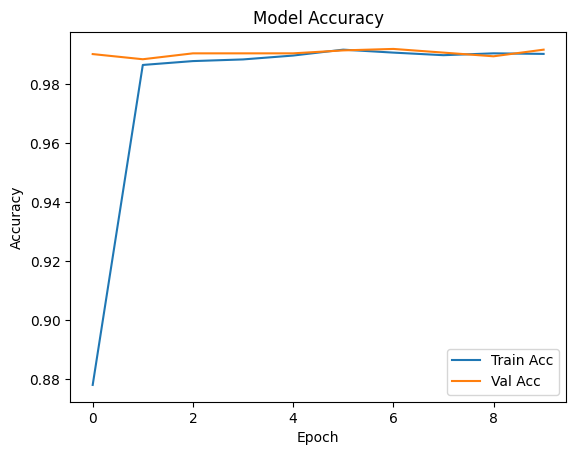

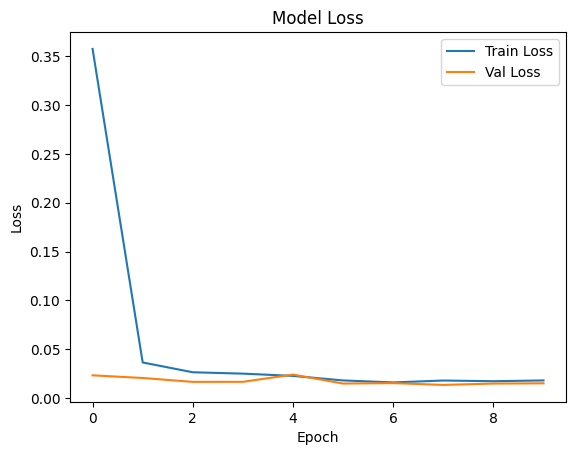

In [15]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
model.save("hand_gesture_model.h5")
print("✅ Model saved as hand_gesture_model.h5")


✅ Model saved as hand_gesture_model.h5


In [17]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load trained model
model = load_model("hand_gesture_model.h5")
classes = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']

# Load video file
video_path = "your_video.mp4"  # upload your video first
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    roi = frame[100:300, 100:300]
    cv2.rectangle(frame, (100, 100), (300, 300), (255, 0, 0), 2)

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (64, 64))
    normalized = resized / 255.0
    reshaped = normalized.reshape(1, 64, 64, 1)

    prediction = model.predict(reshaped)
    class_id = np.argmax(prediction)
    gesture = classes[class_id]

    cv2.putText(frame, f'Gesture: {gesture}', (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.evaluate(X_test, y_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9932 - loss: 0.0137


[0.015193589963018894, 0.9917500019073486]